In [1]:
import numpy as np # for mathematical operations
import pandas as pd # for data manipulation and analysis
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the file
dt = pd.read_csv('Fish.csv')

In [3]:
dt.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
#checking the shape of the dataset
dt.shape

(159, 7)

In [5]:
# checking the datatypes
dt.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
# Statstical Analysis
dt.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [7]:
#checking the null values.
dt.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
# corealtion of the dataset
dt.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


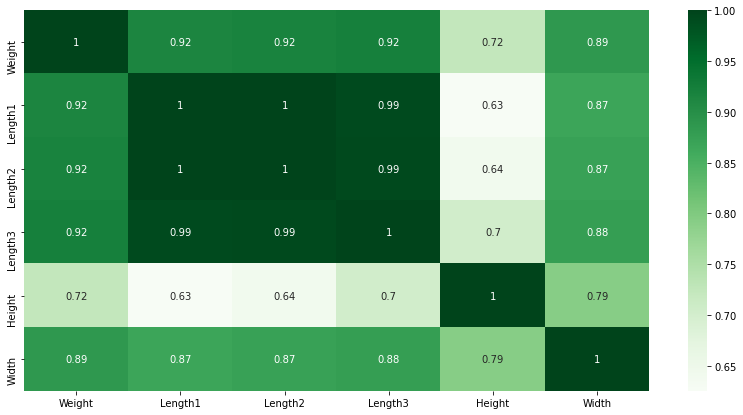

In [9]:
# ploting the heatmap on corelation 
plt.figure(figsize=(14,7))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [10]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
X=dt.iloc[:,1:]
y=dt.iloc[:,0]

In [11]:
# encode the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


In [12]:
# Check for data is balanced or imbalanced
unique_ele, unique_count = np.unique(y,return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_ele, unique_count)))

Frequency of unique values of the said array:
[[ 0  1  2  3  4  5  6]
 [35 11 56 17 20 14  6]]


In [13]:
# Data splitting train test and CV
from sklearn.model_selection import train_test_split

X_1, X_test, y_1, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size= 0.2, random_state=42)

print("X_train shape: ",X_train.shape, "y_train shape: ",y_train.shape)
print("X_cv shape: ",X_cv.shape, "y_cv shape: ",y_cv.shape)
print("X_test shape: ",X_test.shape, "y_test shape: ",y_test.shape)

X_train shape:  (101, 6) y_train shape:  (101,)
X_cv shape:  (26, 6) y_cv shape:  (26,)
X_test shape:  (32, 6) y_test shape:  (32,)


In [14]:
# Fitting the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
depthVal = [2,4,6,8,10,12,14,16,18,20]
for d in depthVal:
  clf = DecisionTreeClassifier(criterion = 'gini',max_depth=d)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_cv)
  print("Acuracy :",accuracy_score(y_pred,y_cv),"for",d)

Acuracy : 0.5769230769230769 for 2
Acuracy : 0.6153846153846154 for 4
Acuracy : 0.6538461538461539 for 6
Acuracy : 0.6923076923076923 for 8
Acuracy : 0.6538461538461539 for 10
Acuracy : 0.6153846153846154 for 12
Acuracy : 0.6538461538461539 for 14
Acuracy : 0.6538461538461539 for 16
Acuracy : 0.6538461538461539 for 18
Acuracy : 0.6538461538461539 for 20


In [15]:
# training the model
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=8)
clf.fit(X_train,y_train)
# predicting the model
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.78125


In [16]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[10  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  5  0  0  0  1]
 [ 0  0  1  3  0  0  0]
 [ 0  0  3  0  1  0  2]
 [ 0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0]]


[Text(638.2125, 513.4, 'X[4] <= 12.579\ngini = 0.781\nsamples = 101\nvalue = [19, 8, 37, 12, 16, 6, 3]'),
 Text(554.5125, 453.0, 'X[5] <= 1.401\ngini = 0.737\nsamples = 83\nvalue = [2, 8, 36, 12, 16, 6, 3]'),
 Text(512.6625, 392.6, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 0, 0, 0, 6, 0]'),
 Text(596.3625000000001, 392.6, 'X[3] <= 45.35\ngini = 0.701\nsamples = 77\nvalue = [2, 8, 36, 12, 16, 0, 3]'),
 Text(439.425, 332.2, 'X[1] <= 25.1\ngini = 0.66\nsamples = 68\nvalue = [2, 8, 35, 4, 16, 0, 3]'),
 Text(251.10000000000002, 271.8, 'X[4] <= 6.569\ngini = 0.657\nsamples = 41\nvalue = [1, 8, 16, 0, 16, 0, 0]'),
 Text(167.4, 211.39999999999998, 'X[2] <= 22.6\ngini = 0.473\nsamples = 26\nvalue = [0, 0, 16, 0, 10, 0, 0]'),
 Text(125.55000000000001, 151.0, 'X[3] <= 23.6\ngini = 0.496\nsamples = 22\nvalue = [0, 0, 12, 0, 10, 0, 0]'),
 Text(83.7, 90.59999999999997, 'X[2] <= 20.75\ngini = 0.444\nsamples = 18\nvalue = [0, 0, 12, 0, 6, 0, 0]'),
 Text(41.85, 30.199999999999932, 'gini = 0.497\nsamples

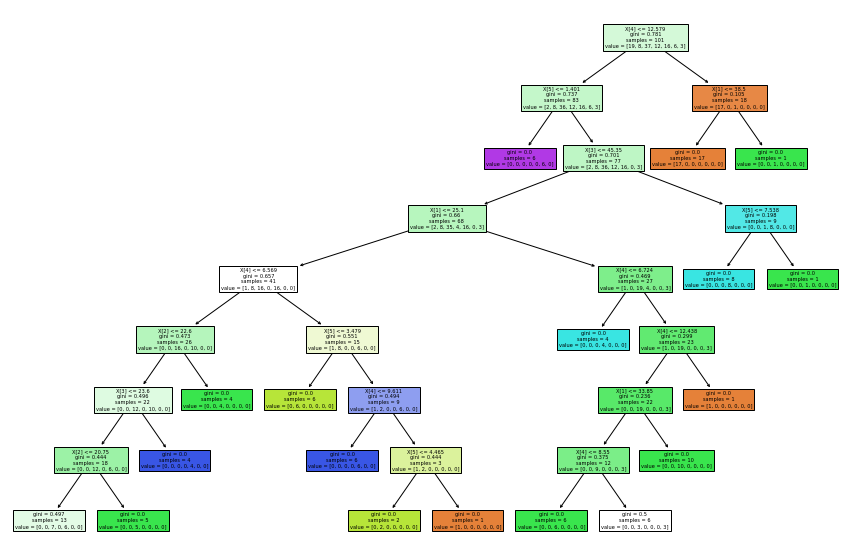

In [17]:
# ploting the tree
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)